In [1]:
from inversion_edits import ddim_inversion_latent

from diffusers import DDIMScheduler, StableDiffusionPipeline
import torch

model_id = "runwayml/stable-diffusion-v1-5"
#model_id = "./cat_finetuned"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to(
    "cuda:0"
)


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

/home/simo/anaconda3/envs/pytorch_latest/lib/python3.8/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


  0%|          | 0/100 [00:00<?, ?it/s]

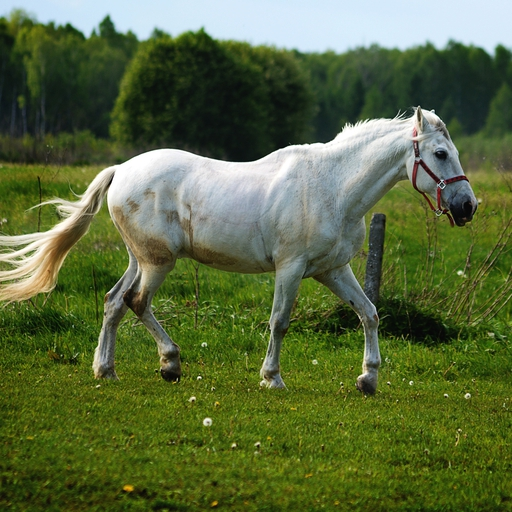

In [33]:
import PIL
x = PIL.Image.open("horse.jpg")
lat = ddim_inversion_latent(pipe, x, condition_prompt="", num_inference_steps= 100)
x

  0%|          | 0/50 [00:00<?, ?it/s]

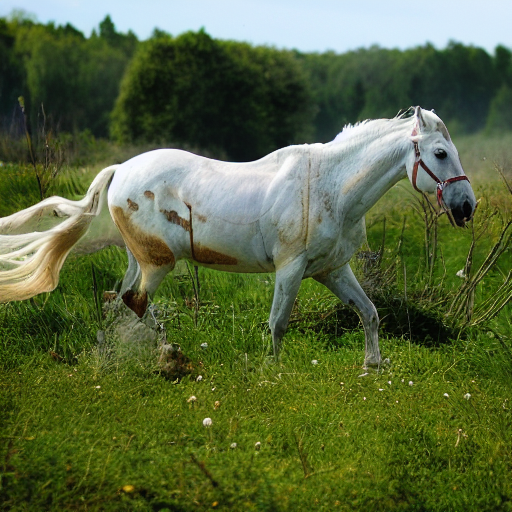

In [35]:
x_reco = pipe(prompt = "", latents = lat)
x_reco.images[0]

In [37]:
pipe.safety_checker = None
x2 = pipe(prompt = "horse with blue boots", latents = lat, num_inference_steps=100, guidance_scale= 7.)

  0%|          | 0/100 [00:00<?, ?it/s]

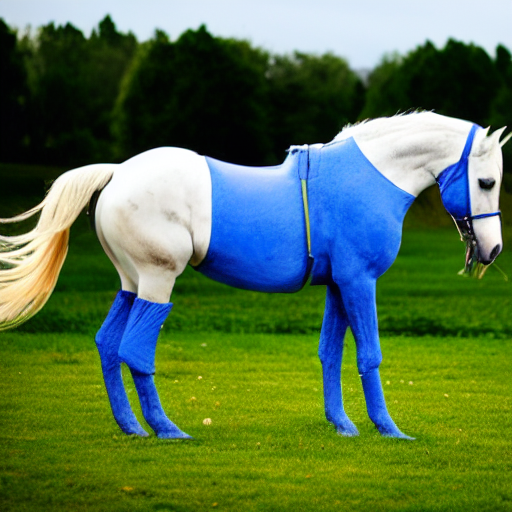

In [38]:
x2.images[0]